# Real Estate Ads in Curitiba Datasets

After explore and analytic a dataset I decide to define the purpose of analytic process first. 
I try to think a situation when customers come to Datasprints and ask for helping about the data.
This task, a customer is an ads scraping company. The ways to make a benefit for the customer is try to understand the customer of our customer. 

The first assumption is an ads scraping company want to sell the data for the real estate advertisers and I think they want to serve their customers who are the real estate advertiser with competitive adventages which other advertiser never know about it.

My second assumption, an ads scraping company can be the one of real estate advertiser who want to understand their users. And to more understand their users who want to buy or rent an estate from their website, this company also decide to scrape ads from their competitor to know more ways how the others advertiser takecare the users.


So, the analytic process will follow by these 2 purposes. Let's begin!!

## Loading Data

A data come with a JSON format, I used Pandas to extract the data. And also load necessary libraries to use for analytic and exploration.

In [2]:
from pandas.io.json import json_normalize
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

the original data contain 5 columns : _id, _index, _score, _source, _type.
I start by unique dataframe column by column to find something useful in future explore.
An '_id', May be it can use to specify each crawler ads when I need.
a _score, _index or _type have one category and no need to deal with it yet.
The _source is our main column to explore and analytic and I use json_normalize to extract the object.

Note : Because I use Macbook and it have very less of memory, I have to delete the variable that I don't use it.

In [16]:
%%time
# Read Json
raw_data = pd.read_json('./realties.json', lines=True)
df = pd.read_json('./realties.json', lines=False)
df_src = json_normalize(data=df['_source'])



CPU times: user 1min 23s, sys: 2min 28s, total: 3min 51s
Wall time: 5min 24s


In [17]:
del raw_data
del df

In [10]:
df.head(3)

_id    _index  _score  \
10     3er7iGcB_HRRL6pGxWnM  realties       1   
1000   eer7iGcB_HRRL6pGDml3  realties       1   
10000  hOndh2cB_HRRL6pGj-Ij  realties       1   

                                                 _source   _type  
10     {'quarto': 3, 'error': [], 'uf': 'PR', 'longit...  imovel  
1000   {'error': [], 'uf': 'PR', 'longitude': -49.253...  imovel  
10000  {'isparticular': False, 'error': [], 'uf': 'PR...  imovel

After see a document that provide with this dataset. the document tell that it have just 42 columns but after see in the dataframe it have 63 columns!!! So, I use the condition to filter column which it need to deal with this task.
The magic number is 100000 because we have 140000 rows and if the column contain a nan more than 100000, I will drop that column.

In [21]:
df_src.columns.shape

(63,)

In [22]:
%%time
## Select columns by follow Data Sprints Doc ##
null_col = df_src.columns[df_src.isna().sum() > 100000]
df_selected = df_src.drop(null_col, axis=1)

del null_col
del df_src

CPU times: user 1.46 s, sys: 3.27 s, total: 4.73 s
Wall time: 6.4 s


A valor column is the first column that I want to see the distribution. And I hope it will show a beautiful bell curve for me after plot it. No!!!, there is no magic left!! 

/Users/nuttakanwiriyakrieng/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Value Distribution - Before Cut Outlier')

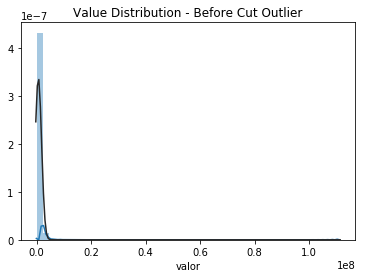

In [23]:
sns.distplot(df_selected['valor'].dropna(), fit=norm).set_title("Value Distribution - Before Cut Outlier")

## Data Wrangling

To avoid the dizzy from swap the head to translate column name. I decide to rename all column that I don't understand it. But I also learn some portuguese words now, Thank you for the task :)

In [24]:
## Translate Columns Name ##
df_selected.rename(columns={"anunciante.id": "advertiser.id", \
                            "anunciante.nome": "advertiser.name", \
                            "bairro.id": "neighborhood.id", \
                            "bairro.nome": "neighborhood.name", \
                            "banheiro": "bathroom", \
                            "cidade.full_name": "city.full_name", \
                            "cidade.short_name": "city.short_name", \
                            "cidade_uf": "city_uf", \
                            "codigo": "code", \
                            "condominio": "condominium", \
                            "data_inclusao": "date_inclusion", \
                            "descricao": "description", \
                            "endereco": "address", \
                            "tipo_negocio": "business_type", \
                            "garagem": "garage", \
                            "lista_fotos": "photolist", \
                            "opcionais": "optional", \
                            "quarto": "bedroom", \
                            "tipo_imovel": "property_type", \
                            "valor": "value", \
                            "zoneamento.id": "zoning.id", \
                            "zoneamento.nome": "zoning.name", \
                            "zoneamento.sigla": "zoning.initials", \
                            "finalidade": "goal"
                           }, inplace=True)

### Drop Duplicate Data 

Duplicate data is the ads which show the same place. if I want to continue explore I have to drop it first. I filter duplicate with just a title column. I don't specific to latitude, longitude, area or value because if real estate is apartment may be it not the duplicate data. So, just title column is enough to drop duplicate data.

In [27]:
df_ddp = df_selected.drop_duplicates(['title'], keep='first')

After drop duplicate we can see some company which on the top ads before drop duplicate are no longer on the top ads after drop the duplicate data.

Note : After drop duplicate the shape change from 149968 to 92247

Text(0.5, 1.0, 'Top ads after drop duplicate')

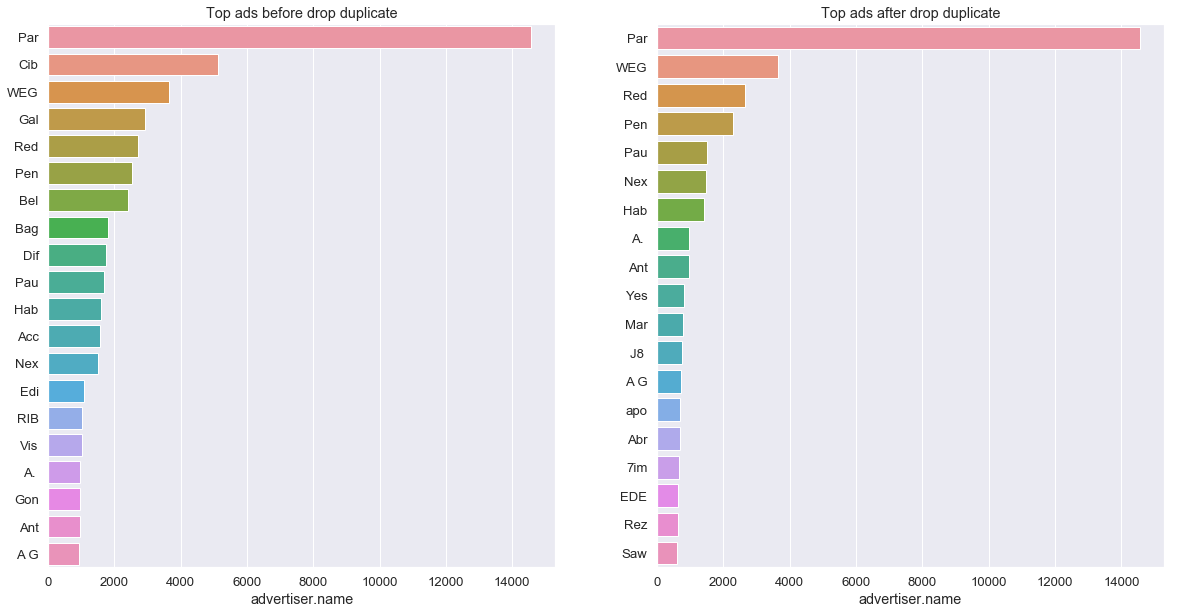

In [29]:
top_ads = df_selected['advertiser.name'].value_counts()
top_ads2 = df_ddp['advertiser.name'].value_counts()

fig, ax = plt.subplots(1,2, figsize=(20, 10))
sns.set(font_scale=1.2)
sns.barplot(y=top_ads.index[:20].map(lambda x: x[:3]), x=top_ads.head(20), ax=ax[0]).set_title("Top ads before drop duplicate")
sns.barplot(y=top_ads2.index[:20].map(lambda x: x[:3]), x=top_ads2.head(20), ax=ax[1]).set_title("Top ads after drop duplicate")

In [ ]:
Who duplicate the data? 
A. Popular Advertiser -> advertiser.name
B. Third Company -> low top ads advertiser.name
C. The Company Crawler -> scraping.spider_name

### See the distribution of value and cut outlier

After plot the distribution of value with no drop duplicate of cut outlier, I saw something interest. The distribution have two normal curve and it looks like a gaussion mixture and I think that maybe I forget something...? may be I have to seperate somethine first.

Text(0.5, 1.0, 'Value Distribution - Before Cut Outlier')

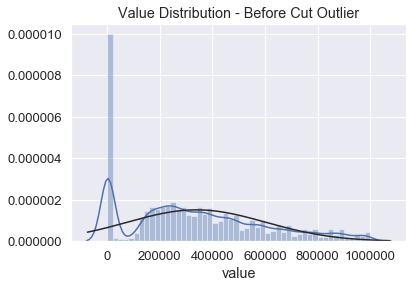

In [48]:
## Plot Value Distribution
sns.distplot(df_selected[df_selected['value'] < 1*1e6]['value'].dropna(), fit=norm).set_title("Value Distribution - Before Cut Outlier")

#### Beware!! Business Type ( Tipo_Negocio )

The answer is business type because I realize that a rent price and sell price never in the same range.

In [50]:
df_sell = df_ddp[df_ddp['business_type'] == 'Venda']
df_rent = df_ddp[df_ddp['business_type'] == 'Locação']

Before plot distribution of value I seperate value with business type : 'Venda' (Selling), 'Locação' (General)
I use a simple z_score in statistic to cut outlier of value which have more standard deviation than the others.

In [55]:
df_sell['z_value'] = np.abs((df_sell['value'] - df_sell['value'].mean())/df_sell['value'].std(ddof=0))
df_wo_sell = df_sell[df_sell['z_value'] < 1]

df_rent['z_value'] = np.abs((df_rent['value'] - df_rent['value'].mean())/df_rent['value'].std(ddof=0))
df_wo_rent = df_rent[df_rent['z_value'] < 1]

/Users/nuttakanwiriyakrieng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/nuttakanwiriyakrieng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Value Distribution - Rent After Cut Outlier')

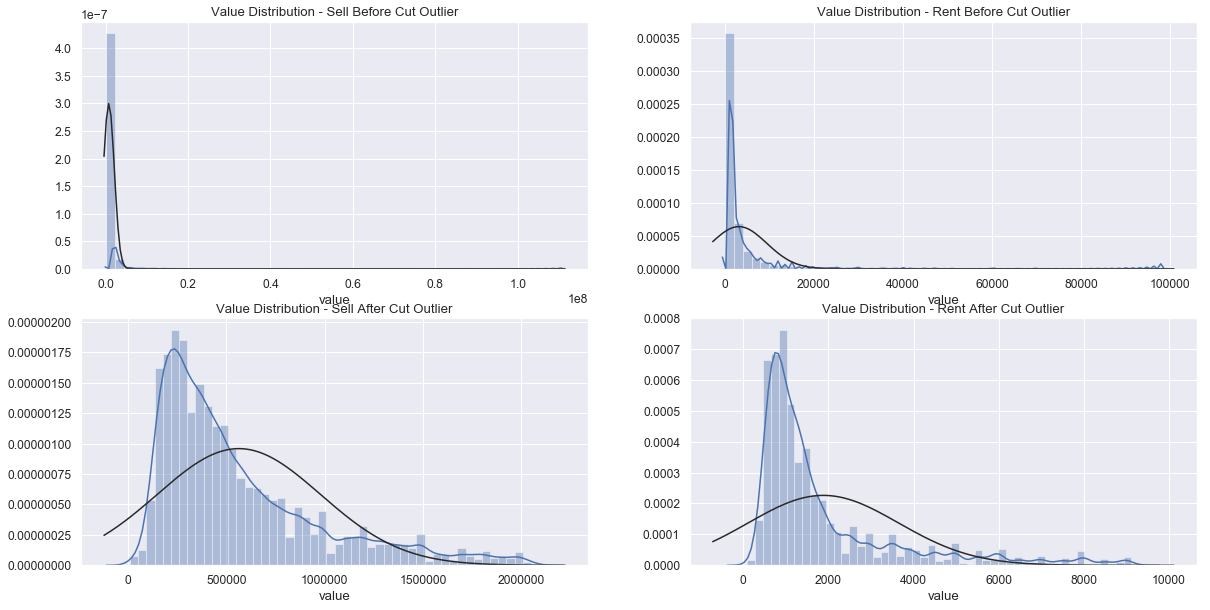

In [60]:
fig, ax = plt.subplots(2,2, figsize=(20, 10))
sns.set(font_scale=1.1)
sns.distplot(df_sell['value'].dropna(), fit=norm, ax=ax[0][0]).set_title("Value Distribution - Sell Before Cut Outlier")
sns.distplot(df_rent['value'].dropna(), fit=norm, ax=ax[0][1]).set_title("Value Distribution - Rent Before Cut Outlier")
sns.distplot(df_wo_sell['value'].dropna(), fit=norm, ax=ax[1][0]).set_title("Value Distribution - Sell After Cut Outlier")
sns.distplot(df_wo_rent['value'].dropna(), fit=norm, ax=ax[1][1]).set_title("Value Distribution - Rent After Cut Outlier")

### Geometry Data

#### Cut Outlier Latitude Longitude

The columns which relate to a geometry are 'latitude', 'longitude', 'geometry.coordinates', 'geohash', and 'geometry.type'. Before I dicide to choose geometry.coordinate or lattitude, longitude, I count NaN on each columns and see that latitude and longitude column have less NaN than geometry.coordinate. But it not significant to choose. And I decide to use latitude and longtitude to lose minimum data. 

In [71]:
df_ddp[['geometry.coordinates', 'latitude', 'longitude']].isnull().sum()

geometry.coordinates    23545
latitude                23533
longitude               23533
dtype: int64

In [72]:
df_dna_geo = df_ddp.dropna(subset=['latitude', 'longitude'], axis=0)

Note : Another way to cut outlier is join dataframe to a map data from shapefile with show in the next step.

In [88]:
# Cut outlier 
df_lat = df_dna_geo['latitude']
df_dna_geo['z_value_lat'] = np.abs((df_lat - df_lat.mean())/df_lat.std(ddof=0))
df_dna_geo = df_dna_geo[df_dna_geo['z_value_lat'] < 1]

df_long = df_dna_geo['longitude']
df_dna_geo['z_value_long'] = np.abs((df_long - df_long.mean())/df_long.std(ddof=0))
df_dna_geo = df_dna_geo[df_dna_geo['z_value_long'] < 1]

/Users/nuttakanwiriyakrieng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/nuttakanwiriyakrieng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Text(0.5, 1.0, 'Value Distribution - After Cut Outlier')

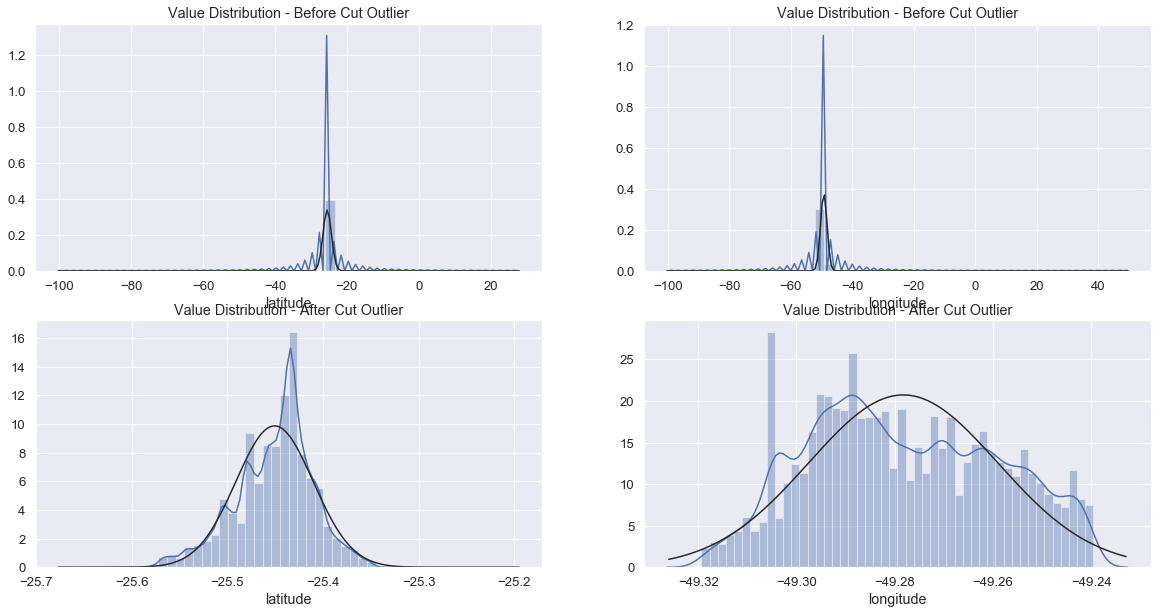

In [89]:
## Plot Value Distribution
fig, ax = plt.subplots(2,2, figsize=(20, 10))
sns.distplot(df_selected['latitude'].dropna(), fit=norm, ax=ax[0][0]).set_title("Value Distribution - Before Cut Outlier")
sns.distplot(df_dna_geo['latitude'], fit=norm, ax=ax[1][0]).set_title("Value Distribution - After Cut Outlier")
sns.distplot(df_selected['longitude'].dropna(), fit=norm, ax=ax[0][1]).set_title("Value Distribution - Before Cut Outlier")
sns.distplot(df_dna_geo['longitude'], fit=norm, ax=ax[1][1]).set_title("Value Distribution - After Cut Outlier")

#### Plot on map!

In [91]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [ ]:
# Download Curitiba Map from this site http://ippuc.org.br/geodownloads/geo.htm
nbh_border_path = './geo/realties/DIVISA_DE_BAIRROS.shp'
nbh_border = gpd.read_file(nbh_border_path)
nbh_border_shape = nbh_border.to_crs({'init':'epsg:4326'})

In [ ]:
zone_path = './geo/Brazil-Curitiba-Zone-SAD69_CWB/ZONEAMENTO.shp'
zone = gpd.read_file(zone_path)
zone_shape = zone.to_crs({'init':'epsg:4326'})

In [ ]:
# Create geometry column to work with geopandas
geometry = [Point(xy) for xy in zip(df_dna_geo['latitude'], df_dna_geo['longitude'])]
df_dna_geo = gpd.GeoDataFrame(df_dna_geo, crs={'init':'epsg:4326'}, geometry=geometry)

In [ ]:
# Create Neighborhood Map and Zone Map
union_nbh = gpd.sjoin(nbh_border_shape, df_dna_geo, op='intersects')
union_zone = gpd.sjoin(zone_shape, df_dna_geo, op='intersects')

Find the top place which show on ads grouping by neighborhood name.

In [ ]:
%%time
df_dna_geo['neighborhood.name'] = df_dna_geo['neighborhood.name'].str.upper()
top_ads_by_nbh = df_dna_geo['neighborhood.name'].value_counts().to_frame()

# fig, ax = plt.subplots(figsize = (30,25))
vmax, vmin = 4944, 3
ax = union_nbh.plot(figsize=(10, 10), column='NOME', cmap='Blues', k=5)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=ax)

Find top mean average selling price grouping by neighborhood name.

In [ ]:
%%time
df_wo_sell['neighborhood.name'] = df_wo_sell['neighborhood.name'].str.upper()
heatmap_value = df_wo_sell.groupby(['neighborhood.name'], as_index=False).mean()
geometry = [Point(xy) for xy in zip(heatmap_value['longitude'], heatmap_value['latitude'])]
heatmap_value = gpd.GeoDataFrame(heatmap_value, crs={'init':'epsg:4326'}, geometry=geometry)
union_nbh_value = gpd.sjoin(nbh_border_shape, heatmap_value, op='intersects')

# fig, ax = plt.subplots(figsize = (30,25))
vmax, vmin = union_nbh_value.value.max(), union_nbh_value.value.min()

ax = union_nbh_value.plot(figsize=(10, 10), column='value', cmap='Blues')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=ax)

Compare with bar chart plot : Top 20 High Selling Price Neighborhood

In [ ]:
top_mean_price = df_wo_sell[['neighborhood.name', 'value']].groupby(['neighborhood.name'], as_index=False).mean()
plt.figure(figsize=(10, 10))
ax = sns.barplot(x="value", y="neighborhood.name", data=top_mean_price.sort_values(by=('value'), ascending=False).head(20))

## Property Tax Analysis

In [ ]:
df_prop_tax['z_value'] = np.abs((df_prop_tax['iptu'] - df_prop_tax['iptu'].mean())/df_prop_tax['iptu'].std(ddof=0))
df_wo_prop_tax = df_prop_tax[df_prop_tax['z_value'] < 1]

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
sns.set(font_scale=1.2)
sns.distplot(df_ddp['iptu'].dropna(), fit=norm, ax=ax[0]).set_title("Property Tax Distribution - Before Cut Outlier")
sns.distplot(df_wo_prop_tax['iptu'].dropna(), fit=norm, ax=ax[1]).set_title("Property Tax Distribution - After Cut outlier")

In [ ]:
Find top mean average tax price grouping by zone name.

In [ ]:
%%time

#To avoid dealing with zoning name match I decide to match with zoning id
heatmap_prop_tax = df_wo_prop_tax.groupby(['zoning.initials'], as_index=False).mean()
geometry = [Point(xy) for xy in zip(heatmap_prop_tax['longitude'], heatmap_prop_tax['latitude'])]
heatmap_prop_tax = gpd.GeoDataFrame(heatmap_prop_tax, crs={'init':'epsg:4326'}, geometry=geometry)
union_zone_prop_tax = gpd.sjoin(zone_shape, heatmap_prop_tax, op='intersects')

# fig, ax = plt.subplots(figsize = (30,25))
vmax, vmin = union_zone_prop_tax.iptu.max(), union_zone_prop_tax.iptu.min()

ax = union_zone_prop_tax.plot(figsize=(10, 10), column='iptu', cmap='magma_r')
sm = plt.cm.ScalarMappable(cmap='magma_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=ax)

In [ ]:
Compare with bar chart plot : Top High Tax Price Zone

In [ ]:
plt.figure(figsize=(10, 20))
ax = sns.barplot(x="iptu", y="zoning.initials", data=heatmap_prop_tax.sort_values(by=('iptu'), ascending=False))

## Property Type Analysis

A main_property_type column is the one of a headache column that I have to deal with. First they contain in type of list data and second some ads have more than one property type.

To category them and count the most property type which were advertised, I choose choose just the firt index of the list and convert it to string.

In [64]:
df_ddp['main_property_type'] = df_ddp['property_type'].apply(lambda x: sorted(x)).apply(lambda x: [x[0]]).apply(' ,'.join)

/Users/nuttakanwiriyakrieng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


A Apartment(Apartmento) is top list of property type which were advertised.

[Text(0.5, 0, 'ads count')]

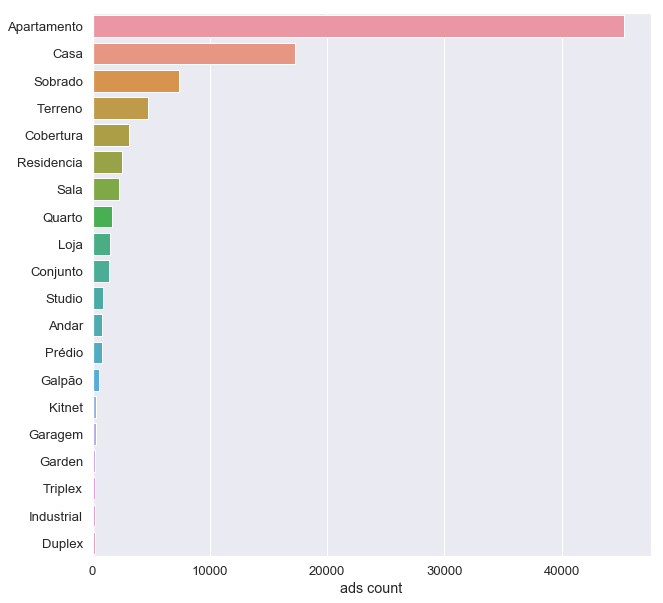

In [65]:
df_ddp['main_property_type'].value_counts()
top_prop_type = df_ddp['main_property_type'].value_counts()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.2)
ax = sns.barplot(y=top_prop_type.index[:20], x=top_prop_type.head(20))
ax.set(xlabel='ads count')